### Name : Himanshu Jaisal

# Prediction Using Supervised ML (Level - Beginner)
### Task 1: Predict the percentage of marks of a student based on the number of study hours

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# stats model
import statsmodels.api as sm

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Data set size
df.shape

(25, 2)

__There are 25 rows and 2 columns in the data.__

In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking Null Value 
df.isna().sum()

Hours     0
Scores    0
dtype: int64

__There is No Null Values in the Data__

In [6]:
# Summary Statistics of the Data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


__From the above table, it is observed that the data is slightly right skewed as mean > median (50%)__

## EDA

#### Distribution plot for 'Hours' & 'Scores'

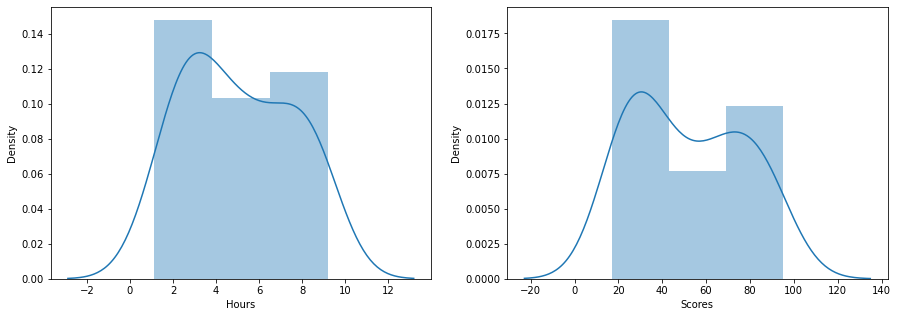

Hours Skewness:  0.1903382010052985 
Scores Skewness:  0.2339646665397317


In [7]:
# Univariate Analysis  
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Hours'],ax=axes[0])
sns.distplot(df['Scores'],ax=axes[1])
plt.show()
print('Hours Skewness: ',df['Hours'].skew(),'\nScores Skewness: ',df['Scores'].skew())

__From both the plots it is observed that the distribution of both the variables is slightly right skewed__

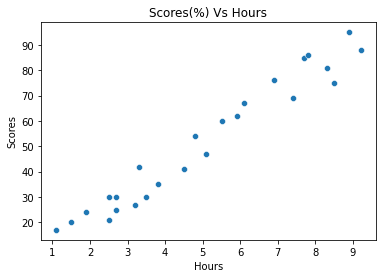

In [8]:
#Bivariate Analysis
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.title('Scores(%) Vs Hours')
plt.show()

__From the above plot, It is observed that there is linear positive relationship between Hours and Scores.__

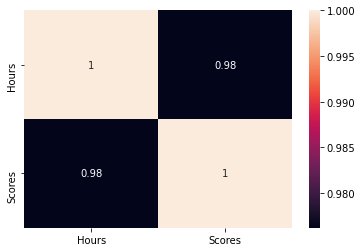

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

__From the Heatmap, It is observed that there is a Strong Positive Correlation between 'Hours' and 'Scores'__

### Preparing the Data

In [10]:
## Dividing the data into Features and Target variable
X = df[['Hours']]
y = df['Scores']

In [11]:
## Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [12]:
## Checking the shapes of train and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


### Fitting the model

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# Linear Regression intercept
lr.intercept_

2.018160041434683

In [15]:
# Linear Regression Coefficient for hours
lr.coef_

array([9.91065648])

* The equation will be:
*   1. Scores = intercept + coefficient*(Hours)
*   2. Scores = 2.01816004 + 9.91065648*(Hours)
    

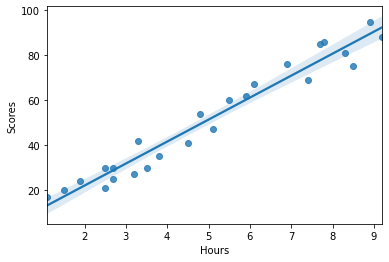

In [16]:
## Plotting the Regression Line
sns.regplot(x = 'Hours', y = 'Scores', data=df)
plt.show()

In [17]:
# Predicting for Xtest
y_pred = lr.predict(X_test)

In [18]:
## Comparing Actual vs Predicted
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [19]:
lr.score(X_test,y_test) #R2 value

0.9454906892105356

__94% variation in the Scores is explained by Hours.__

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
hours = np.array(9.25).reshape(-1,1)
pred = lr.predict(hours)
print('Study hours: ',np.asscalar(hours))
print('Predicted score (%): ',np.asscalar(pred))

Study hours:  9.25
Predicted score (%):  93.69173248737538


### Evaluating the model

In [21]:
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 4.6474476121003665


In [22]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  4.183859899002975
